In [39]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px

# 📥 Load data

The data was downloaded using src/data_ingestion.py

In [3]:
df = pd.read_csv("/Users/erika/code/erika-chang/personal-projects/retirement-dashboard-brazil/data/raw/aposentados.csv", header=[2], sep=';', encoding="iso-8859-1")

# 📊 Overview (head, shape, dtypes)

In [4]:
df.head()

,Nome,CPF,Situação Vínculo,Matrícula,UORG,Órgão,Órgão Superior,Classe,Padrão,Referência,Nível,Regime Jurídico,Fundamentação Aposentadoria (Cod. Sisac),Data Ocorrência,Data DOU,Ato de Aposentadoria,Ingresso no Serviço Público Civil,Documento Legal,Número Doc. Legal,Data de Publicação
0,ABADIA MARCIA CUNHA,***.161.491-**,Aposentado,000*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAE,II,NaN,NaN,RJU,1155083,24/03/1997,24/03/1997,,NaN,NaN,,NaN
1,ABDIAS CASSIO MARROCOS GOMES,***.297.631-**,Aposentado,000*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPTE,IV,NaN,NaN,RJU,1107143,24/12/2021,04/01/2022,112570,NaN,NaN,NaN,NaN
2,ABDIEL ANDRIOLO DE ANDRADE,***.895.388-**,Aposentado,000*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAE,II,NaN,NaN,RJU,1155040,27/02/1997,27/02/1997,,NaN,NaN,,NaN
3,ABDON LOPES DE MENESES,***.983.931-**,Aposentado,000*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPTE,IV,NaN,NaN,RJU,1107143,14/10/2008,15/10/2008,47447,NaN,NaN,,NaN
4,ABEL ALFREDO FILHO,***.347.385-**,Aposentado,000*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAE,IV,NaN,NaN,RJU,1107143,28/11/2022,01/12/2022,115578,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Nome,CPF,Situação Vínculo,Matrícula,UORG,Órgão,Órgão Superior,Classe,Padrão,Referência,Nível,Regime Jurídico,Fundamentação Aposentadoria (Cod. Sisac),Data Ocorrência,Data DOU,Ato de Aposentadoria,Ingresso no Serviço Público Civil,Documento Legal,Número Doc. Legal,Data de Publicação
5400,ZULEICA DE MELO TELES,***.533.991-**,Aposentado,999*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAB,III,NaN,NaN,RJU,1155083,28/04/1998,28/04/1998,,NaN,NaN,,NaN
5401,ZULEICA MARIA SOUZA PORTO,***.454.201-**,Aposentado,999*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAC,III,NaN,NaN,RJU,1155083,27/03/1998,27/03/1998,,NaN,NaN,,NaN
5402,ZULMA GONCALVES DIAS,***.828.526-**,Aposentado,999*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAC,I,NaN,NaN,RJU,11020871,10/04/2000,10/04/2000,,NaN,NaN,,NaN
5403,ZULMAR MAYETA,***.113.787-**,Aposentado,999*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAE,IV,NaN,NaN,RJU,1107143,02/07/2018,03/07/2018,98600,NaN,NaN,,NaN
5404,ZULMIRA MARIA BERNARDES NORMANDO,***.805.121-**,Aposentado,999*****,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAE,III,NaN,NaN,RJU,1155083,03/04/1997,03/04/1997,,NaN,NaN,,NaN


In [6]:
df.shape

(5405, 20)

There is information on 5405 employees from the Central Bank.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5405 entries, 0 to 5404
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Nome                                      5405 non-null   object 
 1   CPF                                       5405 non-null   object 
 2   Situação Vínculo                          5405 non-null   object 
 3   Matrícula                                 5405 non-null   object 
 4   UORG                                      5405 non-null   int64  
 5   Órgão                                     5405 non-null   object 
 6   Órgão Superior                            5405 non-null   object 
 7   Classe                                    5405 non-null   object 
 8   Padrão                                    5405 non-null   object 
 9   Referência                                0 non-null      float64
 10  Nível                               

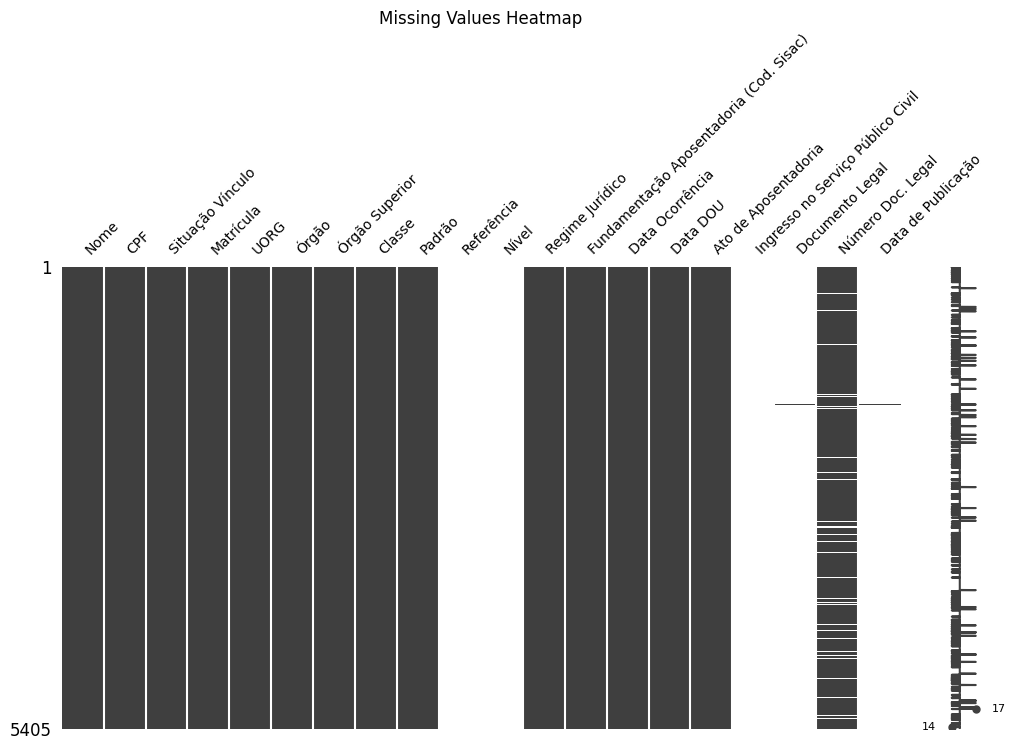

In [8]:
msno.matrix(df, figsize=(12,6), fontsize=10)
plt.title("Missing Values Heatmap")
plt.show()

In [9]:
aposentados_df = df.drop(columns=["Referência", "Nível","Ingresso no Serviço Público Civil", "CPF", "Matrícula"])

There are many columns without information, so these were excluded from the data.

In [10]:
aposentados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5405 entries, 0 to 5404
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Nome                                      5405 non-null   object 
 1   Situação Vínculo                          5405 non-null   object 
 2   UORG                                      5405 non-null   int64  
 3   Órgão                                     5405 non-null   object 
 4   Órgão Superior                            5405 non-null   object 
 5   Classe                                    5405 non-null   object 
 6   Padrão                                    5405 non-null   object 
 7   Regime Jurídico                           5405 non-null   object 
 8   Fundamentação Aposentadoria (Cod. Sisac)  5405 non-null   object 
 9   Data Ocorrência                           5405 non-null   object 
 10  Data DOU                            

In [11]:
aposentados_df.nunique()

Nome                                        5398
Situação Vínculo                               1
UORG                                           1
Órgão                                          1
Órgão Superior                                 1
Classe                                        10
Padrão                                         4
Regime Jurídico                                1
Fundamentação Aposentadoria (Cod. Sisac)      32
Data Ocorrência                             2088
Data DOU                                    2116
Ato de Aposentadoria                        3087
Documento Legal                                1
Número Doc. Legal                             17
Data de Publicação                            12
dtype: int64

In [12]:
aposentados_df.head(3)

,Nome,Situação Vínculo,UORG,Órgão,Órgão Superior,Classe,Padrão,Regime Jurídico,Fundamentação Aposentadoria (Cod. Sisac),Data Ocorrência,Data DOU,Ato de Aposentadoria,Documento Legal,Número Doc. Legal,Data de Publicação
0,ABADIA MARCIA CUNHA,Aposentado,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAE,II,RJU,1155083,24/03/1997,24/03/1997,,NaN,,NaN
1,ABDIAS CASSIO MARROCOS GOMES,Aposentado,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPTE,IV,RJU,1107143,24/12/2021,04/01/2022,112570,NaN,NaN,NaN
2,ABDIEL ANDRIOLO DE ANDRADE,Aposentado,25201,BANCO CENTRAL DO BRASIL,BANCO CENTRAL DO BRASIL,BCESPAE,II,RJU,1155040,27/02/1997,27/02/1997,,NaN,,NaN


In [13]:
aposentados_df.drop(columns=["Situação Vínculo", "UORG", "Órgão", "Órgão Superior", "Regime Jurídico", "Documento Legal"], inplace=True)

Many columns don't add relevant information to the dataset, so these were excluded.

In [14]:
aposentados_df.head(3)

,Nome,Classe,Padrão,Fundamentação Aposentadoria (Cod. Sisac),Data Ocorrência,Data DOU,Ato de Aposentadoria,Número Doc. Legal,Data de Publicação
0,ABADIA MARCIA CUNHA,BCESPAE,II,1155083,24/03/1997,24/03/1997,,,NaN
1,ABDIAS CASSIO MARROCOS GOMES,BCESPTE,IV,1107143,24/12/2021,04/01/2022,112570,NaN,NaN
2,ABDIEL ANDRIOLO DE ANDRADE,BCESPAE,II,1155040,27/02/1997,27/02/1997,,,NaN


In [16]:
aposentados_df[aposentados_df.isnull()['Número Doc. Legal'] != True]

,Nome,Classe,Padrão,Fundamentação Aposentadoria (Cod. Sisac),Data Ocorrência,Data DOU,Ato de Aposentadoria,Número Doc. Legal,Data de Publicação
0,ABADIA MARCIA CUNHA,BCESPAE,II,1155083,24/03/1997,24/03/1997,,,NaN
2,ABDIEL ANDRIOLO DE ANDRADE,BCESPAE,II,1155040,27/02/1997,27/02/1997,,,NaN
3,ABDON LOPES DE MENESES,BCESPTE,IV,1107143,14/10/2008,15/10/2008,47447,,NaN
5,ABEL AMBROSIO DA SILVA FILHO,BCESPAE,III,1155083,30/12/1997,30/12/1997,,,NaN
6,ABEL EUSTAQUIO DE FARIA,BCESPAE,IV,1107143,09/09/2011,12/09/2011,67061,,NaN
...,...,...,...,...,...,...,...,...,...
5400,ZULEICA DE MELO TELES,BCESPAB,III,1155083,28/04/1998,28/04/1998,,,NaN
5401,ZULEICA MARIA SOUZA PORTO,BCESPAC,III,1155083,27/03/1998,27/03/1998,,,NaN
5402,ZULMA GONCALVES DIAS,BCESPAC,I,11020871,10/04/2000,10/04/2000,,,NaN
5403,ZULMAR MAYETA,BCESPAE,IV,1107143,02/07/2018,03/07/2018,98600,,NaN


In [17]:
aposentados_df.drop(columns=["Número Doc. Legal"], inplace=True)

The "Número Doc. Legal" column also had no information, altough it was not marked as NaN or other markers for missing information. This column was excluded from the data.

# 📌 Top 10 retirement reasons

In [70]:
aposentados_df.value_counts("Fundamentação Aposentadoria (Cod. Sisac)")

Fundamentação Aposentadoria (Cod. Sisac)
1107143     2267
1155083     1743
1155040      498
11020951     237
1104047      171
APOS-174      91
1460617       73
11020871      62
1155008       32
1154907       27
1193368       24
1106910       24
1193350       23
APOS-144      22
11026301      18
1106902       18
APOS-176      10
1103075       10
1107160        9
APOS-160       8
1106899        6
APOS-161       5
APOS-138       4
APOS-175       4
11019942       4
11020791       3
1106880        3
1104012        3
1104535        2
APOS-139       2
APOS-127       1
APOS-142       1
dtype: int64

The information about the reasons why a person is retired is at the ""Fundamentação Aposentadoria (Cod. Sisac)" column. The information is coded according to the **fundamentacao.csv** document.

In [30]:
fund_df = pd.read_csv("/Users/erika/code/erika-chang/personal-projects/retirement-dashboard-brazil/data/raw/fundamentacao.csv", sep=';', encoding="iso-8859-1")

In [31]:
fund_df.head(3)

,Código,Descrição,Base Legal
0,11019861,APOSENTADORIA COMPULSÓRIA - EC 20,"ART.40,§1,INC.II-CF COM REDAÇÃO EC 20, C/C ART..."
1,11019942,APOSENTADORIA VOLUNTÁRIA INTEGRAL - EC 20 - RE...,"ART.40,§1,III,""A""-CF COM REDAÇÃO EC20 E 3º,§2º..."
2,11020791,APOSENTADORIA VOLUNTÁRIA PROPORCIONAL POR IDAD...,"ART.40,§1,III,""B""-CF COM REDAÇÃO EC20 E 3º,§2º..."


In [32]:
fund_df.set_index("Código", inplace=True)

In [33]:
fund_dict = fund_df.to_dict()

In [35]:
aposentados_df["Fundamentação Aposentadoria (Cod. Sisac)"] = aposentados_df["Fundamentação Aposentadoria (Cod. Sisac)"].replace(fund_dict["Descrição"])

In [36]:
top_reasons = aposentados_df.value_counts("Fundamentação Aposentadoria (Cod. Sisac)").head(10).reset_index()
top_reasons.columns = ['Description','Frequency']
top_reasons

,Description,Frequency
0,APOSENTADORIA VOLUNTÁRIA INTEGRAL - ART. 3º - ...,2267
1,APOSENTADORIA VOLUNTÁRIA PROPORCIONAL - LEI 81...,1743
2,APOSENTADORIA VOLUNTÁRIA INTEGRAL - LEI 8112/90,498
3,APOSENTADORIA VOLUNTÁRIA PROPORCIONAL - EC 20 ...,237
4,APOSENTADORIA VOLUNTÁRIA IDADE/TEMPO DE CONTRI...,171
5,APOSENTADORIA VOL. EC 103 - ART. 20,91
6,INTEGRALIZACAO DE PROVENTOS - Art. 190,73
7,APOSENTADORIA VOLUNTÁRIA INTEGRAL - EC 20 - RE...,62
8,APOSENTADORIA POR INVALIDEZ PERMANENTE - LEI 8...,32
9,APOSENTADORIA POR INVALIDEZ SIMPLES - LEI 8112/90,27


In [40]:
fig = px.bar(
    top_reasons.sort_values("Frequency"),
    x="Frequency",
    y="Description",
    orientation="h",
    title="Top 10 Retirement Reasons – Central Bank Civil Servants",
    labels={"Frequency": "Number of Retirements", "Description": "Retirement Reason"},
    color="Frequency",
    color_continuous_scale="Blues"
)

fig.update_layout(
    yaxis_title="",
    xaxis_title="Number of Retirements",
    plot_bgcolor="white",
    showlegend=False
)

fig.show()

An analysis of the retirement justifications listed under the Fundamentação da Aposentadoria reveals important patterns in how public servants at the Central Bank of Brazil have exited their careers. The data shows a clear predominance of voluntary retirements, heavily shaped by successive waves of pension reform in Brazilian legislation.

The **most common** justification by far is **“Aposentadoria Voluntária Integral - Art. 3º - EC 47”**, with 2,267 recorded cases. This refers to a transitional rule introduced by Constitutional Amendment No. 47/2005, which allowed many long-tenured civil servants to **retire with full benefits under more favorable conditions than newer entrants**. This high frequency suggests that a significant portion of the workforce benefited from the legal stability and privileges afforded by earlier retirement rules.

Following closely is the proportional **voluntary retirement under Law 8.112/90**, Brazil’s statute governing civil servants, with 1,743 occurrences. This pathway typically applies to **employees who chose to retire before meeting the criteria for full retirement**, resulting in reduced benefits. The popularity of this route may reflect a balance between personal career timing and institutional policies.

Other notable categories include retirements under EC 20 and EC 41, two major constitutional reforms that reshaped retirement eligibility. These are generally transition rules for those caught between legislative changes, indicating how legal flux over decades has left its mark on retirement behavior.

# 👥 Personal Profile

In [104]:
class_df = pd.read_csv("/Users/erika/code/erika-chang/personal-projects/retirement-dashboard-brazil/data/raw/classes.csv", sep=';', encoding="iso-8859-1")

In [107]:
class_df.set_index('Código', inplace=True)

In [108]:
class_dict = class_df.to_dict()

In [110]:
class_dict['Descrição']

{'BCESPAA': 'Analista do Banco Central, Classe A',
 'BCESPAB': 'Analista do Banco Central, Classe B',
 'BCESPAC': 'Analista do Banco Central, Classe C',
 'BCESPAE': 'Analista do Banco Central, Classe Especial',
 'BCESPTA': 'Técnico do Banco Central, Classe A',
 'BCESPTB': 'Técnico do Banco Central, Classe B',
 'BCESPTC': 'Técnico do Banco Central, Classe C',
 'BCESPTE': 'Técnico do Banco Central, Classe Especial',
 'BCJURP1': 'Procurador do Banco Central, Primeira Categoria',
 'BCJURP2': 'Procurador do Banco Central, Segunda Categoria',
 'BCJURPE': 'Procurador do Banco Central, Categoria Especial'}

In [111]:
aposentados_df["Classe"] = aposentados_df["Classe"].replace(class_dict["Descrição"])

In [45]:
count_classes = aposentados_df.value_counts("Classe").reset_index()
count_classes.columns = ["Class", "Retiree number"]
count_classes

,Class,Retiree number
0,BCESPAE,3637
1,BCESPAC,573
2,BCESPAB,556
3,BCESPTE,466
4,BCJURPE,98
5,BCESPAA,34
6,BCESPTC,30
7,BCJURP1,7
8,BCESPTB,3
9,BCESPTA,1


In [44]:
fig = px.bar(
    count_classes,
    x="Retiree number",
    y="Class",
    orientation="h",
    title="Distribution of Retirees per Career Class",
    color="Retiree number",
    color_continuous_scale="Blues"
)

fig.update_layout(
    xaxis_title="Retiree number",
    yaxis_title="Class",
    plot_bgcolor="white",
    showlegend=False
)

fig.show()

The classification of retirees by career class offers valuable insight into the professional structure and retirement patterns within the Central Bank of Brazil.

The overwhelming majority of retirees held senior positions at the time of retirement, especially: **"Analista do Banco Central, Classe Especial"** (3,637 individuals) and **"Técnico do Banco Central, Classe Especial"** (466 individuals). These are the highest career tiers for their respective tracks, indicating that **most public servants retire after full career progression**.
This pattern reflects a strong culture of long-term career development, where civil servants tend to remain within the institution for decades, gradually climbing the career ladder.

Mid- and lower-tier classes appear in much smaller numbers: **Analistas – Classe C** (573) and **Classe B** (556) still show **notable presence**, while **Classe A (34) is rare**. For Technicians, **the lower classes (C, B, A) are even less common**. These numbers suggest that **early retirement or mid-career exits are uncommon**. Employees often only retire after reaching a level of seniority that likely corresponds with maximum benefit accrual and stability.

A much smaller subset of retirees were Procuradores do Banco Central (legal/prosecutorial career): 98 in the top tier ("Categoria Especial"), and only 7 in the lower tier ("Primeira Categoria"). This likely reflects a more selective or limited career track, either with fewer overall positions or more specialized entrance/retention criteria.

The high concentration of retirees in top classes could pose a succession planning challenge: as experienced professionals leave, they take deep institutional knowledge with them. On the positive side, **the data reflects a well-structured career pipeline**, where employees are incentivized to remain and grow within the institution.